**Homophobic Tweets Analysis - Final Project**
*By: Anna Zwolińska and Alex Gdańska*

Preparation: Uploading the dataset and preparing all of the necessary libraries.


In [1]:
#Uploading all of the necessary libraries
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [2]:
#Uploading the data set
df = pd.read_csv('hatespeech_data.csv')

#Checking the datasets first few rows
display(df.head())

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


2. Filtering the data set and creating a new sample from it, only containing homophobic speech.

In [3]:
#Filtering the homophobic tweets from the hatespeech
hate_df = df[df["class"] == 0].copy()

In [4]:
#2 Keyword seperation, the homophobic slurs and anti-lgbtq words are used to distinctively seperate the homophobic tweets from hatespeech. They are used purely for academic purposes.

homophobia_keywords = [
    "fag","fags","faggot","faggots",
    "dyke", "dykes",
    "homo", "homos",
    "tranny", "trannies", "trans",
    "gay", "lesbian", "anti-gay", "anti-lgbt",
    "no homo", "anti gay", "anti lgbt", "queer", "anti-queer",
    ]

In [5]:
#Cleaning the dataset. Removing urls, mentions and hashtags to make everything more easy to read.

def clean_text(s):
    s = str(s).lower()
    s = re.sub(r"http\S+|www\.\S+", " ", s)  # urls
    s = re.sub(r"@\w+", " ", s)             # mentions
    s = re.sub(r"#\w+", " ", s)             # hashtags
    s = re.sub(r"\s+", " ", s).strip()
    return s

hate_df["tweet_clean"] = hate_df["tweet"].apply(clean_text)

In [6]:
#Matching the keywords mentioned above, with those in the data set. The aim is to seperate the tweets entirely and making a sample of tweets to be used for analysis.
def contains_kw(text, keywords):
    for kw in keywords:
        kw = kw.lower().strip()
        if " " in kw:               # phrase
            if kw in text:
                return True
        else:                       # whole word
            if re.search(rf"\b{re.escape(kw)}\b", text):
                return True
    return False

hate_df["is_homophobic"] = hate_df["tweet_clean"].apply(lambda t: contains_kw(t, homophobia_keywords))

In [7]:
#the full sample to be used in the analysis containing only homophobic tweets.
homo_hate_df = hate_df[hate_df["is_homophobic"]].copy()

print("Hate speech tweets:", len(hate_df))
print("Homophobic hate speech tweets:", len(homo_hate_df))

# show examples
pd.set_option("display.max_colwidth", None)
homo_hate_df[["tweet"]].sample(10, random_state=42)

Hate speech tweets: 1430
Homophobic hate speech tweets: 430


,tweet
23975,"i find it funny when fags write ""looking for bf"" on a grindr ap. LOL thats a fucking ap dumbass."
3315,@GrizzboAdams fucking block your white ass because you try to start shit like a fucking queer so fuck you NIGGA
5601,@bellaangeletti ur a fag
2324,@2014samanthaKay good enough fag
19136,RT @iBeZo: Stupid fucking nigger LeBron. You flopping stupid jungle bunny monkey faggot.
21188,Stu a rape faced faggot man I'm sick of this nigga
5230,@YourDudeFerg gay fags
5172,@WyattNuckels @grizzboadams shut the fuck up fag ill beat the shit outta you
5381,@_____0__o______ faggot
5557,@austin_farrar your a fucking queer faggot bitch


3. Creating the first sample of homophobic tweets to analyse the topics appearing in the said tweets samples (50 tweets)

In [8]:
sample_1 = homo_hate_df.sample(n=50, random_state=42)

In [9]:
pd.set_option("display.max_colwidth", None)

In [10]:
sample_1[["tweet"]]

,tweet
23975,"i find it funny when fags write ""looking for bf"" on a grindr ap. LOL thats a fucking ap dumbass."
3315,@GrizzboAdams fucking block your white ass because you try to start shit like a fucking queer so fuck you NIGGA
5601,@bellaangeletti ur a fag
2324,@2014samanthaKay good enough fag
19136,RT @iBeZo: Stupid fucking nigger LeBron. You flopping stupid jungle bunny monkey faggot.
21188,Stu a rape faced faggot man I'm sick of this nigga
5230,@YourDudeFerg gay fags
5172,@WyattNuckels @grizzboadams shut the fuck up fag ill beat the shit outta you
5381,@_____0__o______ faggot
5557,@austin_farrar your a fucking queer faggot bitch


4. Manually annotating the Sample 1 and adding categories + Analysis

In [11]:
#Uploading the data from excel manual categorization
df_1 = pd.read_csv('Sample 1.csv')

In [12]:
#Checking if the tweets and categories appear
df_1.head()

,Number,Tweet,Category
0,23975,"i find it funny when fags write ""looking for bf"" on a grindr ap. LOL thats a fucking ap dumbass.",Gender Norms
1,3315,@GrizzboAdams fucking block your white ass because you try to start shit like a fucking queer so fuck you NIGGA,Race
2,5601,@bellaangeletti ur a fag,No context
3,2324,@2014samanthaKay good enough fag,No context
4,19136,RT @iBeZo: Stupid fucking nigger LeBron. You flopping stupid jungle bunny monkey faggot.,Sports


In [13]:
#Checking the categories and number of tweets per category

topic_counts = df_1["Category"].value_counts()
print(topic_counts)

Category
No context       11
Entertainment    10
Gender Norms      8
Race              6
Social            6
Sports            3
Politics          3
Gaming            2
Religion          1
Name: count, dtype: int64


In [14]:
#Checking the categories % wise
topic_percent = df_1["Category"].value_counts(normalize=True) * 100
print(topic_percent.round(1))

Category
No context       22.0
Entertainment    20.0
Gender Norms     16.0
Race             12.0
Social           12.0
Sports            6.0
Politics          6.0
Gaming            4.0
Religion          2.0
Name: proportion, dtype: float64


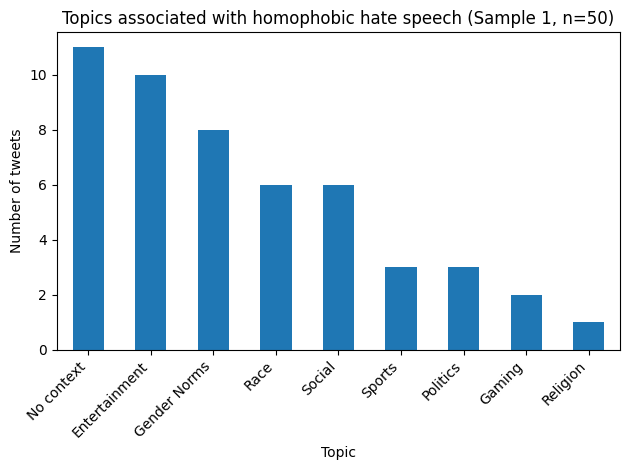

In [15]:
#Visualizing the results uring the bar chart
topic_counts.plot(kind="bar")
plt.title("Topics associated with homophobic hate speech (Sample 1, n=50)")
plt.xlabel("Topic")
plt.ylabel("Number of tweets")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

5. Creating Sample 2 - to be analysed using the data results from sample 1.

In [16]:
#Excluding sample 1 from sample 2, to make sure we dont have any repeating tweets.
sample_1 = sample_1.copy()
remaining_df = homo_hate_df.drop(index=sample_1.index)
sample_2 = remaining_df.sample(n=50, random_state=99)

In [17]:
pd.set_option("display.max_colwidth", None)
sample_2[["tweet"]]

,tweet
23947,how the fuck do all these fucking faggot ass randos even find zoe's ask account????
15701,RT @JEN_JEN_2014: My old man has a white galaxy phone cuz he's a fag.
2521,"@BGALLY17 so ur faggot teammate @BrandonPrust8 hits someone late like that and U say he's yapping and yelling, u guys def 69 in the room"
6091,@heyrmbr probs that fag Vhia
588,"""Why people think gay marriage is okay is beyond me. Sorry I don't want my future son seeing 2 fags walking down the street holding hands an"
3660,@JimBoberson happy birthday faggot
10701,I love all people for who they are but there's this one fag that goes to my school that can catch a ninja star to the face ASAP
2853,@Christian_ESEM you don't know what your talking about retarded faggot
9488,Good Morning to lightskin dyke bitches with Steven Segal ponytails.
6487,@kiela_g_3 &#128514;&#128514;Alright fag what about this? http://t.co/5ht61NmjJ3


6. Manually annotating the Sample 2

In [18]:
#Uploading the data from excel manual categorization
df_2 = pd.read_csv('Sample 2.csv')

In [19]:
df_2.head()

,Number,Tweet,Category
0,23947,how the fuck do all these fucking faggot ass randos even find zoe's ask account????,Entertainment
1,15701,RT @JEN_JEN_2014: My old man has a white galaxy phone cuz he's a fag.,Social
2,2521,"@BGALLY17 so ur faggot teammate @BrandonPrust8 hits someone late like that and U say he's yapping and yelling, u guys def 69 in the room",Sport
3,6091,@heyrmbr probs that fag Vhia,No context
4,588,"""Why people think gay marriage is okay is beyond me. Sorry I don't want my future son seeing 2 fags walking down the street holding hands an",Gender Norms


In [20]:
#Checking the categories and number of tweets per category

topic_counts = df_2["Category"].value_counts()
print(topic_counts)

Category
No context       18
Social            9
Entertainment     8
Gender Norms      7
Race              3
Politics          2
Sport             1
Religion          1
Gaming            1
Name: count, dtype: int64


In [21]:
#Checking the categories % wise
topic_percent = df_2["Category"].value_counts(normalize=True) * 100
print(topic_percent.round(1))

Category
No context       36.0
Social           18.0
Entertainment    16.0
Gender Norms     14.0
Race              6.0
Politics          4.0
Sport             2.0
Religion          2.0
Gaming            2.0
Name: proportion, dtype: float64


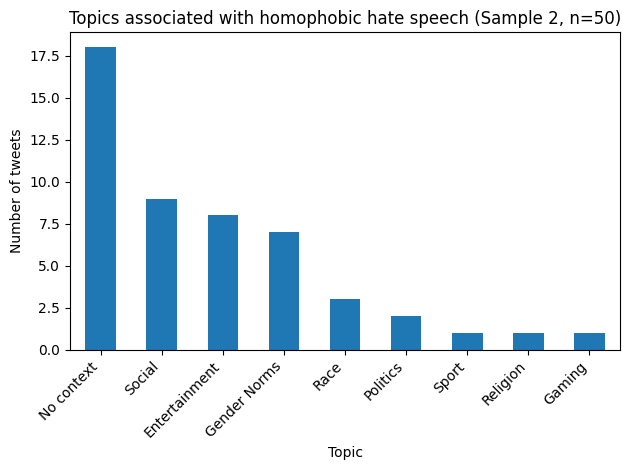

In [22]:
#Visualizing the results uring the bar chart
topic_counts.plot(kind="bar")
plt.title("Topics associated with homophobic hate speech (Sample 2, n=50)")
plt.xlabel("Topic")
plt.ylabel("Number of tweets")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

7. Analysing the corralation between sample 1 and sample 2 + Frequency of topics


In [23]:
#Showing the category results from both Sample 1 and Sample 2
freq_1 = df_1["Category"].value_counts()
freq_2 = df_2["Category"].value_counts()

print("Sample 1 topic counts:\n", freq_1)
print("\nSample 2 topic counts:\n", freq_2)

Sample 1 topic counts:
 Category
No context       11
Entertainment    10
Gender Norms      8
Race              6
Social            6
Sports            3
Politics          3
Gaming            2
Religion          1
Name: count, dtype: int64

Sample 2 topic counts:
 Category
No context       18
Social            9
Entertainment     8
Gender Norms      7
Race              3
Politics          2
Sport             1
Religion          1
Gaming            1
Name: count, dtype: int64


In [24]:
#Calculating the frequency of categories across Sample 1 and Sample 2
freq_df = pd.DataFrame({
    "Sample 1": freq_1,
    "Sample 2": freq_2
}).fillna(0)

freq_df

,Sample 1,Sample 2
Category,,
Entertainment,10.0,8.0
Gaming,2.0,1.0
Gender Norms,8.0,7.0
No context,11.0,18.0
Politics,3.0,2.0
Race,6.0,3.0
Religion,1.0,1.0
Social,6.0,9.0
Sport,0.0,1.0


In [25]:
#Calculating the % of the Categories in Sample 1 and 2
percent_df = freq_df.div(freq_df.sum(axis=0), axis=1) * 100
percent_df.round(1)

,Sample 1,Sample 2
Category,,
Entertainment,20.0,16.0
Gaming,4.0,2.0
Gender Norms,16.0,14.0
No context,22.0,36.0
Politics,6.0,4.0
Race,12.0,6.0
Religion,2.0,2.0
Social,12.0,18.0
Sport,0.0,2.0


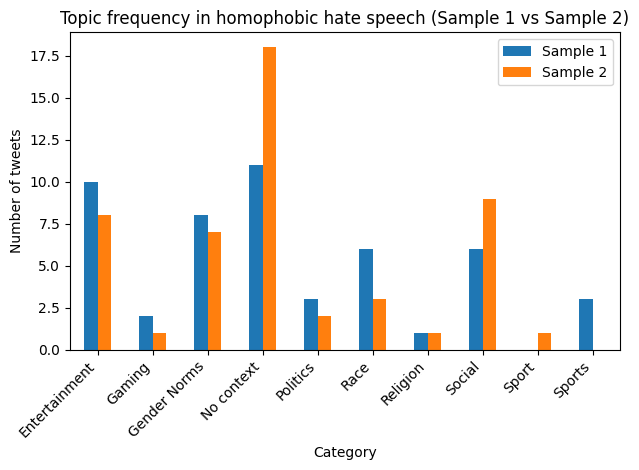

In [26]:
#Showing the total topic frequency using the bar chart. Compareing Sample 1 and 2.
freq_df.plot(kind="bar")
plt.title("Topic frequency in homophobic hate speech (Sample 1 vs Sample 2)")
plt.xlabel("Category")
plt.ylabel("Number of tweets")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [27]:
#Calculating the corralation between sample 1 and sample 2
corr, p_value = spearmanr(freq_df["Sample 1"], freq_df["Sample 2"])

print("Spearman correlation (ρ):", round(corr, 3))
print("p-value:", round(p_value, 4))

Spearman correlation (ρ): 0.84
p-value: 0.0024


According to the results the corralation between topics in sample 1 and 2 have high corralation. With the topics most often appearing in Sample 1, also often appearing in Sample 2.

In [28]:
#The results of the most common topics linked to homophobic speech across two samples (100 tweets)
freq_df["Average"] = freq_df.mean(axis=1)
freq_df.sort_values("Average", ascending=False)

,Sample 1,Sample 2,Average
Category,,,
No context,11.0,18.0,14.5
Entertainment,10.0,8.0,9.0
Social,6.0,9.0,7.5
Gender Norms,8.0,7.0,7.5
Race,6.0,3.0,4.5
Politics,3.0,2.0,2.5
Gaming,2.0,1.0,1.5
Sports,3.0,0.0,1.5
Religion,1.0,1.0,1.0


8. Conclusion

- The topics appearing across sample 1 and 2 have high corralation. The topics most often appearing in Sample 1 are also the ones most often appearing in Sample 2.
- The topics most frequently linked to the homophobic tweets appear to be: Entertainment, Social and Gender Norms (Not considering the No context). The least appearing topics in the tweets related to homophobia is Sport.